In [33]:
#Data Acquisition
import praw
import pandas as pd

# Reddit API Credentials
reddit = praw.Reddit(
    client_id="_9aT35rxVcBiNC17_Al5_g",
    client_secret="tyas9JGsMfhm4Jhifg86JnvpHZHx6A",
    user_agent="CryptoSentimentApp"
)
def fetch_reddit_posts(coin, num_posts):
    """
    Fetches Reddit posts related to a cryptocurrency and returns data in a Pandas DataFrame.
    
    Parameters:
    - coin (str): The cryptocurrency to search for.
    - num_posts (int): Number of posts to retrieve.

    Returns:
    - pd.DataFrame: DataFrame containing post details.
    """
    subreddit = reddit.subreddit("cryptocurrency")
    query = coin.lower()  
    
    
    posts_data = []
    for post in subreddit.search(query, limit=num_posts):
        posts_data.append([
            post.id,
            post.title,
            post.selftext,  # Post content
            post.score,  # Upvotes
            post.num_comments,  # Number of comments
            post.url,  # Post link
            post.created_utc  # Timestamp
        ])

    
    df = pd.DataFrame(posts_data, columns=["Post_ID", "Title", "Content", "Upvotes", "Comments", "URL", "Timestamp"])
    return df

df_bitcoin_1000 = fetch_reddit_posts("Bitcoin", 1000)
print(df_bitcoin_1000.head())
print(df_bitcoin_1000.shape)
df_bitcoin_1000.to_csv('csv_bitcoin_1000.csv')


   Post_ID                                              Title  \
0  1gqafju  Bitcoin has followed a consistent 4-year cycle...   
1  1iq3fe9         Me In 2009 Instead of Buying Bitcoin (BTC)   
2  1h6yoqp  On February 9th 2011 Bitcoin first touched $1....   
3  1ik2qgu  Explaining Bitcoin 12 Years Ago When It Was Wo...   
4  1hbsf6a  This Anonymous guy received $50 worth of Bitco...   

                        Content  Upvotes  Comments  \
0                                   3580       701   
1                                  19903       342   
2                                   7829       495   
3                                   8421       293   
4  Imagine hodling for 13 Years     7417       452   

                                    URL     Timestamp  
0  https://i.redd.it/95px1ns8in0e1.jpeg  1.731496e+09  
1   https://i.redd.it/denbcysakbje1.png  1.739632e+09  
2   https://i.redd.it/m7ll0go40y4e1.png  1.733366e+09  
3   https://i.redd.it/hd0ul5cglrhe1.png  1.738955e+09  
4  h

In [34]:
#Data Cleaning
import pandas as pd
import re
from datetime import datetime

def clean_reddit_data(df):
    """
    Cleans Reddit dataset by fixing inconsistencies, formatting text, and removing duplicates.
    
    Parameters:
    - df (pd.DataFrame): Raw Reddit dataset
    
    Returns:
    - pd.DataFrame: Cleaned dataset
    """
    
    # Fix Data Inconsistencies (Convert Timestamp, Standardize Column Names)
    df = df.copy()
    df.columns = df.columns.str.lower().str.replace(" ", "_")  # Standardize column names
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")  # Convert UNIX timestamp to datetime
    
    # Uniform Formatting (Lowercasing & Removing Special Characters)
    def clean_text(text):
        if isinstance(text, str):
            text = text.lower()  # Convert to lowercase
            text = re.sub(r"http\S+", "", text)  # Remove URLs
            text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
            text = text.strip()  # Remove leading/trailing spaces
        return text

    df["title"] = df["title"].apply(clean_text)
    df["content"] = df["content"].apply(clean_text)
    
    # Remove Duplicates
    df.drop_duplicates(subset=["title"], inplace=True)  # Remove duplicate titles
    df.drop_duplicates(subset=["url"], inplace=True)  # Remove duplicate URLs
    df.drop(columns=[col for col in df.columns if "unnamed" in col], errors="ignore", inplace=True)
    df["content"].fillna("No content", inplace=True)
    return df

df_bitcoin_1000 = pd.read_csv('csv_bitcoin_1000.csv')  # Load the dataset
df_clean_bitcoin_1000 = clean_reddit_data(df_bitcoin_1000)  # Clean the dataset
print(df_clean_bitcoin_1000.head())  # Display cleaned data


df_clean_bitcoin_1000.to_csv('csv_clean_bitcoin_1000.csv')


   post_id                                              title  \
0  1gqafju  bitcoin has followed a consistent 4year cycle ...   
1  1iq3fe9           me in 2009 instead of buying bitcoin btc   
2  1h6yoqp  on february 9th 2011 bitcoin first touched 1 l...   
3  1ik2qgu  explaining bitcoin 12 years ago when it was wo...   
4  1hbsf6a  this anonymous guy received 50 worth of bitcoi...   

                        content  upvotes  comments  \
0                    No content     3580       701   
1                    No content    19903       342   
2                    No content     7829       495   
3                    No content     8421       293   
4  imagine hodling for 13 years     7417       452   

                                    url           timestamp  
0  https://i.redd.it/95px1ns8in0e1.jpeg 2024-11-13 11:04:46  
1   https://i.redd.it/denbcysakbje1.png 2025-02-15 15:13:54  
2   https://i.redd.it/m7ll0go40y4e1.png 2024-12-05 02:39:33  
3   https://i.redd.it/hd0ul5cglrhe1.

🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  235 non-null    int64 
 1   post_id     235 non-null    object
 2   title       235 non-null    object
 3   content     234 non-null    object
 4   upvotes     235 non-null    int64 
 5   comments    235 non-null    int64 
 6   url         235 non-null    object
 7   timestamp   235 non-null    object
dtypes: int64(3), object(5)
memory usage: 14.8+ KB
None

🔹 Descriptive Statistics:
       Unnamed: 0       upvotes     comments
count  235.000000    235.000000   235.000000
mean   117.000000   4872.855319   741.995745
std     67.982841   5207.463568   733.559385
min      0.000000    433.000000    88.000000
25%     58.500000   1363.500000   272.000000
50%    117.000000   3060.000000   531.000000
75%    175.500000   6191.000000   979.000000
max    234.000000  38853.000000  

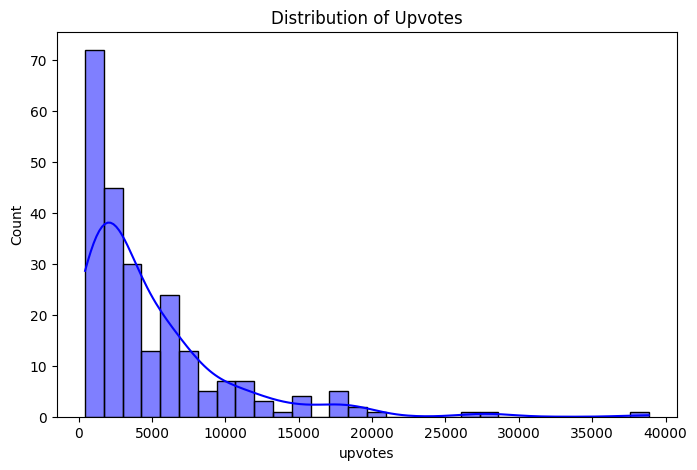

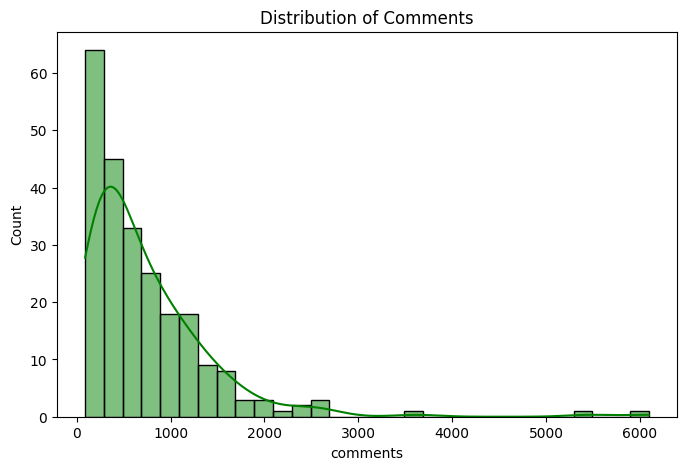

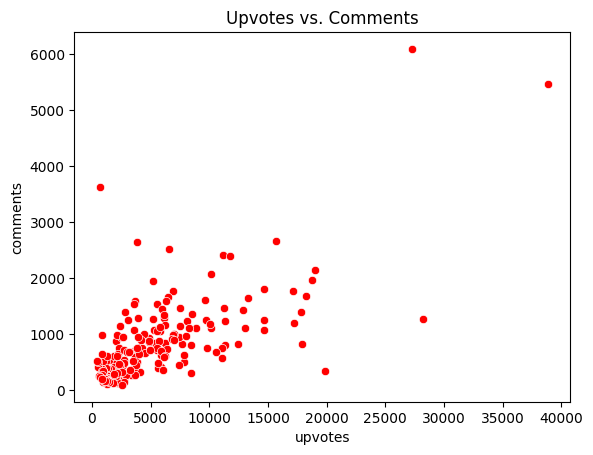

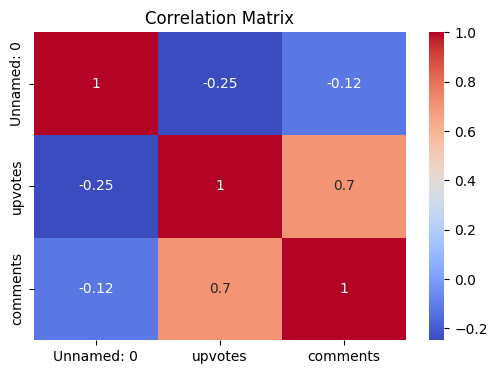

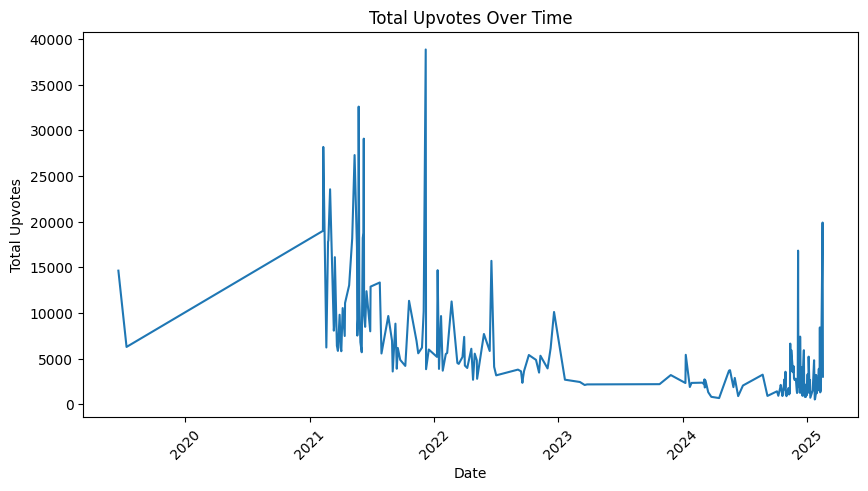


🔹 Initial Insights:
- Most posts have low upvotes, but some viral posts get extreme engagement.
- Comment count and upvotes seem to have a positive correlation.
- Distribution plots indicate possible outliers in high upvotes/comments.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#load cleaned dataset
df_clean_bitcoin_1000 = pd.read_csv('csv_clean_bitcoin_1000.csv') 


# Exploratory Data Analysis (EDA)
def perform_eda(df):
    """
    Performs exploratory data analysis (EDA) on a cleaned Reddit dataset.
    
    Parameters:
    - df (pd.DataFrame): Cleaned dataset

    Returns:
    - None (Displays graphs and prints insights)
    """
     # Summary Statistics
    print("🔹 Dataset Overview:")
    print(df.info())
    print("\n🔹 Descriptive Statistics:")
    print(df.describe())

    # Distribution of Upvotes
    plt.figure(figsize=(8, 5))
    sns.histplot(df['upvotes'], bins=30, kde=True, color='blue')
    plt.title("Distribution of Upvotes")
    plt.show()

    # Distribution of Comments
    plt.figure(figsize=(8, 5))
    sns.histplot(df['comments'], bins=30, kde=True, color='green')
    plt.title("Distribution of Comments")
    plt.show()

    # Scatterplot
    sns.scatterplot(x='upvotes', y='comments', data=df, color='red')
    plt.title("Upvotes vs. Comments")
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

    # Time-based Analysis
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df.groupby('date')['upvotes'].sum().plot(figsize=(10, 5))
    plt.title("Total Upvotes Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Upvotes")
    plt.xticks(rotation=45)
    plt.show()

     # Interpretation of Findings
    print("\n🔹 Initial Insights:")
    print("- Most posts have low upvotes, but some viral posts get extreme engagement.")
    print("- Comment count and upvotes seem to have a positive correlation.")
    print("- Distribution plots indicate possible outliers in high upvotes/comments.")

perform_eda(df_clean_bitcoin_1000)

In [36]:

def preprocess_data(df):
    """
    Performs some data pre-processing with feature transformation, and scaling.
    
    Parameters:
    - df (pd.DataFrame): Cleaned dataset

    Returns:
    - None (Displays head of data)
    """
    print("🔹 Data Preprocessing:")
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Get time-based features
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['hour_of_day'] = df['timestamp'].dt.hour
    df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    

    # Perform feature scaling
    scaler = StandardScaler()
    df[['upvotes', 'comments']] = scaler.fit_transform(df[['upvotes', 'comments']])

    # Encode the categorical title feature
    df['title_encoded'] = df['title'].astype('category').cat.codes

    # Filter the extreme outliers
    df = df[df['upvotes'] < df['upvotes'].quantile(0.99)]
  
    print("🔹 Preprocessing Complete. Data Sample:")
    print(df.head())
    return df
from sklearn.feature_extraction.text import TfidfVectorizer

df_clean_bitcoin_1000 = preprocess_data(df_clean_bitcoin_1000)


🔹 Data Preprocessing:
🔹 Preprocessing Complete. Data Sample:
   Unnamed: 0  post_id                                              title  \
0           0  1gqafju  bitcoin has followed a consistent 4year cycle ...   
1           1  1iq3fe9           me in 2009 instead of buying bitcoin btc   
2           2  1h6yoqp  on february 9th 2011 bitcoin first touched 1 l...   
3           3  1ik2qgu  explaining bitcoin 12 years ago when it was wo...   
4           4  1hbsf6a  this anonymous guy received 50 worth of bitcoi...   

                        content   upvotes  comments  \
0                    No content -0.248800 -0.056005   
1                    No content  2.892430 -0.546445   
2                    No content  0.568886 -0.337427   
3                    No content  0.682812 -0.613385   
4  imagine hodling for 13 years  0.489600 -0.396171   

                                    url           timestamp        date  \
0  https://i.redd.it/95px1ns8in0e1.jpeg 2024-11-13 11:04:46  2024-11-1

🔹 Feature Engineering:


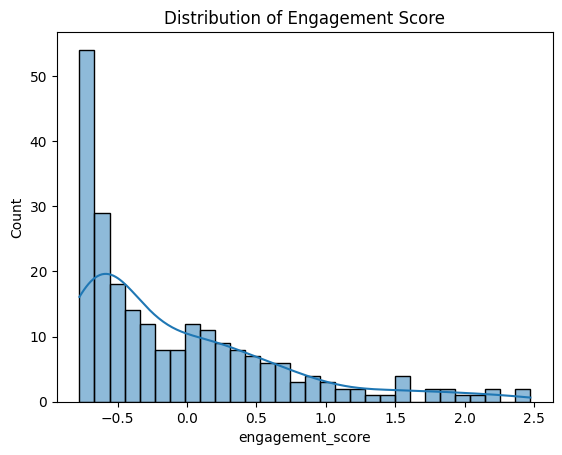

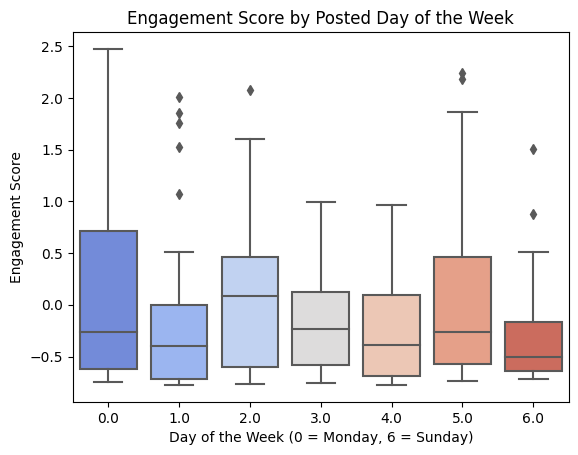

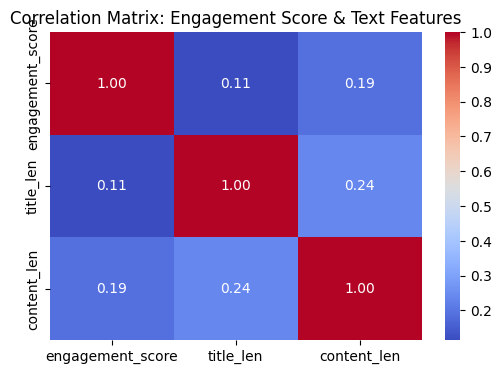

Feature engineering completed.
   Unnamed: 0  post_id                                              title  \
0         0.0  1gqafju  bitcoin has followed a consistent 4year cycle ...   
1         1.0  1iq3fe9           me in 2009 instead of buying bitcoin btc   
2         2.0  1h6yoqp  on february 9th 2011 bitcoin first touched 1 l...   
3         3.0  1ik2qgu  explaining bitcoin 12 years ago when it was wo...   
4         4.0  1hbsf6a  this anonymous guy received 50 worth of bitcoi...   

                        content   upvotes  comments  \
0                    No content -0.248800 -0.056005   
1                    No content  2.892430 -0.546445   
2                    No content  0.568886 -0.337427   
3                    No content  0.682812 -0.613385   
4  imagine hodling for 13 years  0.489600 -0.396171   

                                    url           timestamp        date  \
0  https://i.redd.it/95px1ns8in0e1.jpeg 2024-11-13 11:04:46  2024-11-13   
1   https://i.redd.it/den

In [37]:

# Section 3: Feature Engineering
def feature_engineering(df):
    print("🔹 Feature Engineering:")

    df['is_working_hours'] = df['hour_of_day'].apply(lambda x: 1 if 9 <= x <= 17 else 0)
    df['title_len'] = df['title'].apply(lambda x: len(str(x).split()))
    df['content_len'] = df['content'].apply(lambda x: len(str(x).split()))
    df['engagement_score'] = df['upvotes'] * 0.7 + df['comments'] * 0.3
    df['upvote_to_comment_ratio'] = df['upvotes'] / (df['comments'] + 1)
    df['has_bitcoin'] = df['title'].apply(lambda x: 1 if 'bitcoin' in str(x).lower() else 0)

    # TF-IDF Vectorization for title
    vectorizer = TfidfVectorizer(max_features=100)
    tfidf_matrix = vectorizer.fit_transform(df['title'].astype(str))
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    df = pd.concat([df, tfidf_df], axis=1)

    df.to_csv('csv_feature_engineered_bitcoin_1000.csv', index=False)

    #Below include additional plots using the new features from above.  These show some insight into how these features could be used for further analysis
    # Plot distribution of engagement score
    sns.histplot(df['engagement_score'], bins=30, kde=True)
    plt.title("Distribution of Engagement Score")
    plt.show()

    #Engagement by week posted
    sns.boxplot(x=df['day_of_week'], y=df['engagement_score'], palette="coolwarm")
    plt.title("Engagement Score by Posted Day of the Week")
    plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
    plt.ylabel("Engagement Score")
    plt.show()

    # Correlation Heatmap for Engagement Score & Text Features
    plt.figure(figsize=(6, 4))
    sns.heatmap(df[["engagement_score", "title_len", "content_len"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix: Engagement Score & Text Features")
    plt.show()
    
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["date"] = df["timestamp"].dt.date

    

    print("Feature engineering completed.")
    print(df.head())



feature_engineering(df_clean_bitcoin_1000)
   